# Superstore Analysis

In [27]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as sns

In [28]:
#Загрузим датасет
df = pd.read_csv('Sample - Superstore.csv',encoding='cp1252')


In [29]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

##### удалите столбцы: 'Row ID', 'Order ID', 'Country'

In [33]:
df = df.drop(columns = ['Row ID','Order ID','Country'])


In [34]:
df

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [35]:
df.columns.tolist()

['Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

### Data Visualization 

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})    #sns.set устанавлаивает тему с помощью seaborn, которая будет синхр  с pd и plt

<Axes: xlabel='count', ylabel='Category'>

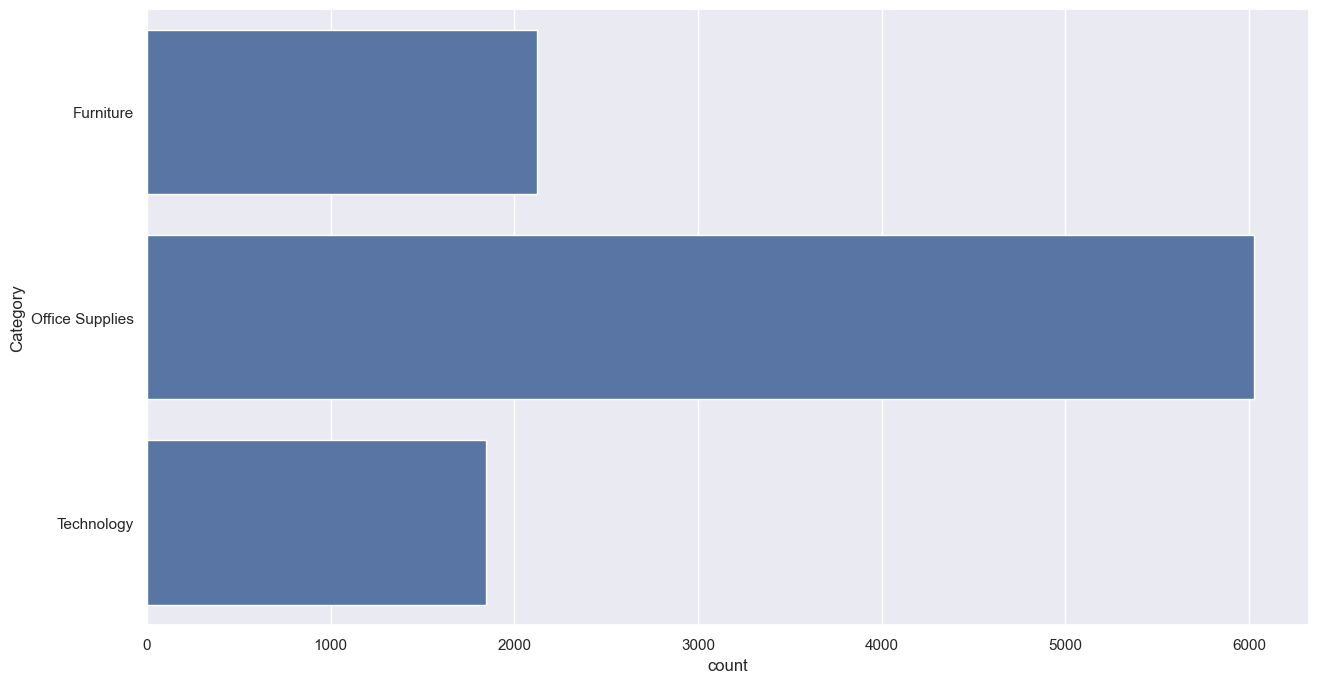

In [37]:
plt.figure()
sns.countplot(df,y = 'Category')

<Axes: ylabel='Category'>

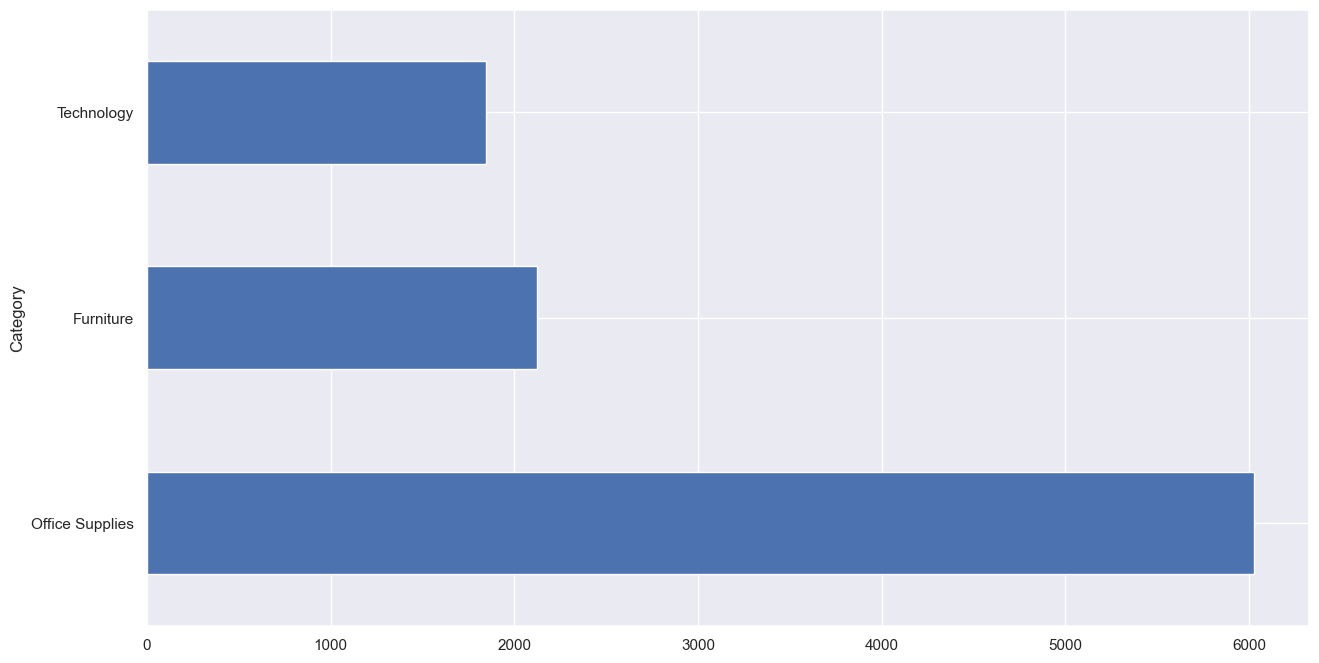

In [38]:
df['Category'].value_counts().plot(kind = 'barh')

C:\Users\akzholtoev_a\AppData\Local\Temp\ipykernel_18868\811367116.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = 'Ship Mode',palette = 'rocket')


<Axes: xlabel='Ship Mode', ylabel='count'>

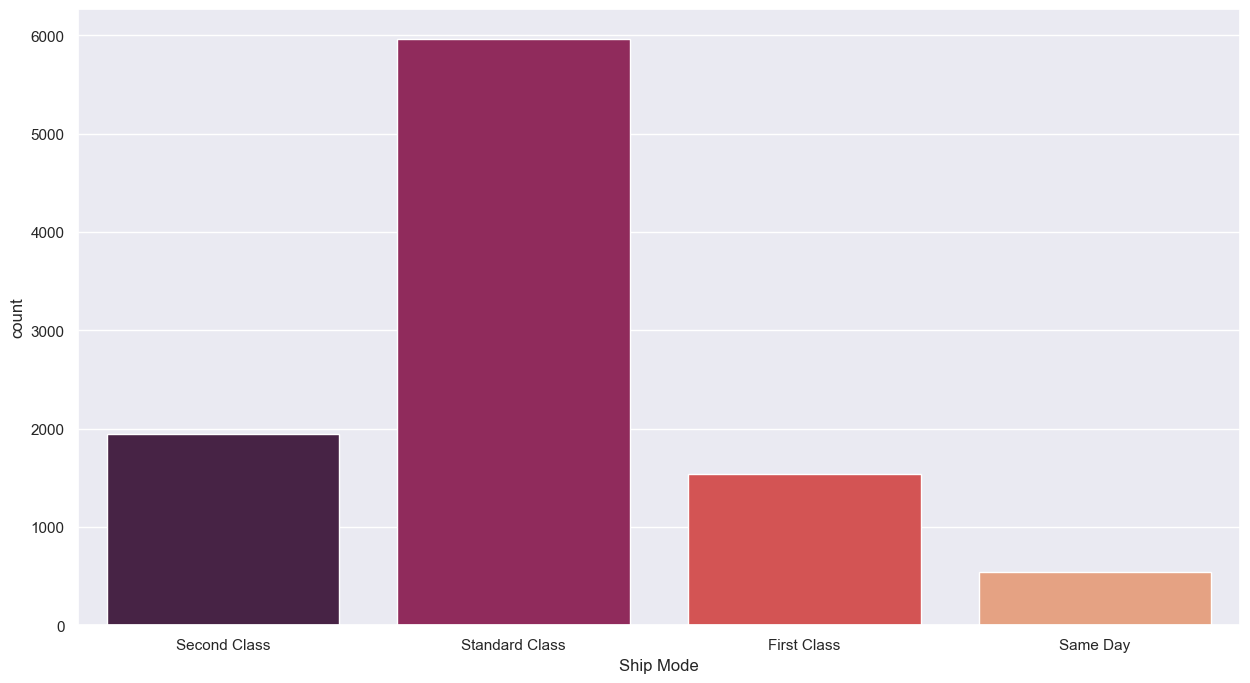

In [39]:
sns.countplot(df,x = 'Ship Mode',palette = 'rocket')

<Axes: title={'center': 'Most pop ship modes'}, xlabel='Ship Mode'>

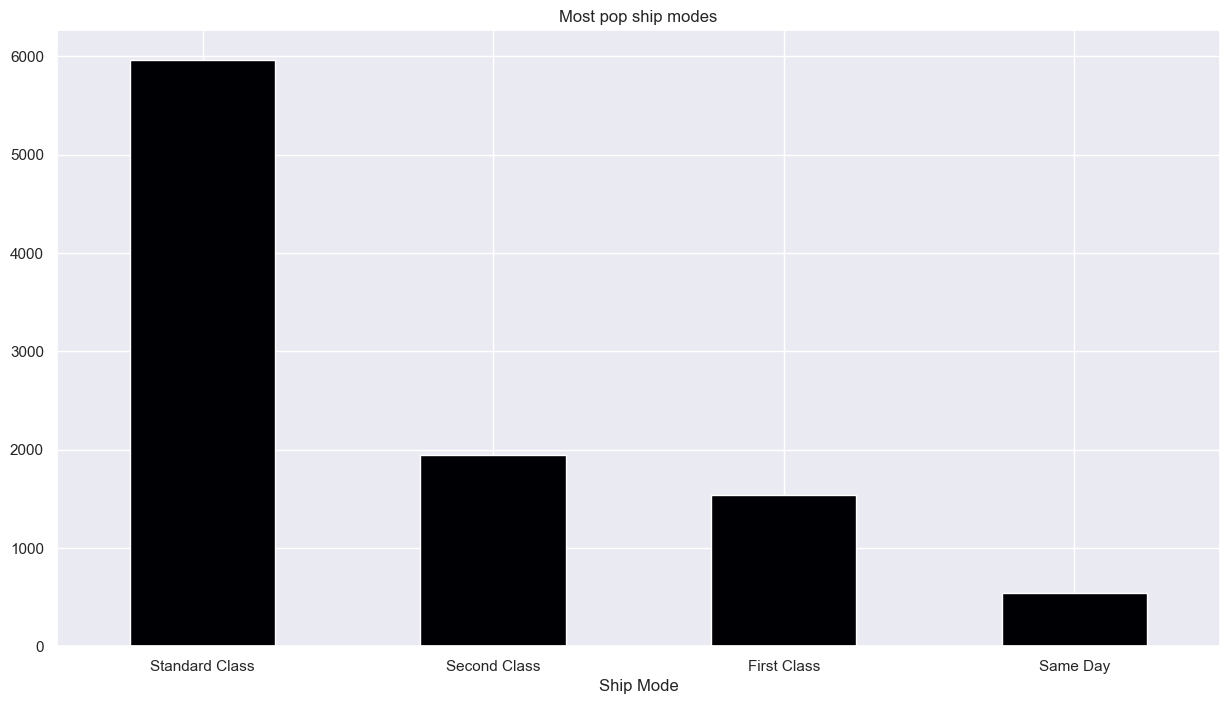

In [40]:
df['Ship Mode'].value_counts().plot(kind = 'bar',title = 'Most pop ship modes', rot = 0,colormap = 'magma')

### Profit Per Category 


In [41]:
ppc = df.groupby("Category")['Profit'].sum()

In [42]:
ppc

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

<Axes: title={'center': 'Profit per category'}, ylabel='Category'>

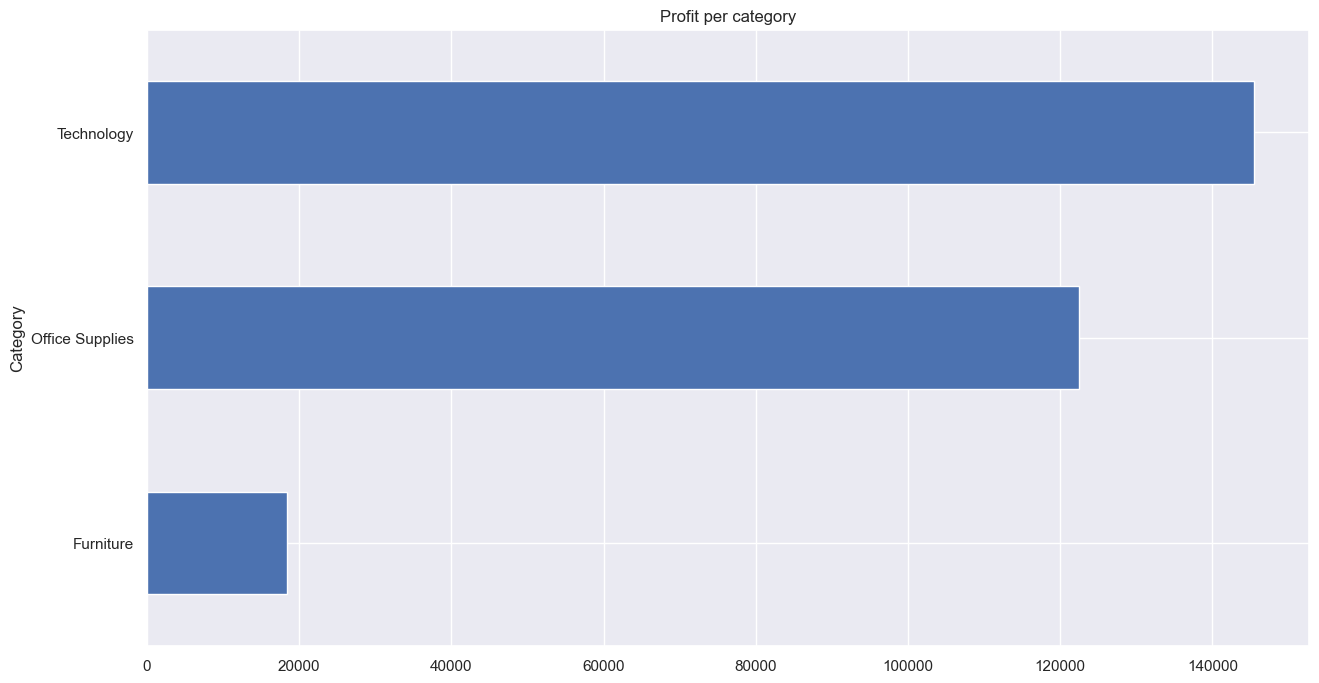

In [43]:
ppc.plot(kind = 'barh',title = 'Profit per category')

In [44]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

<Axes: title={'center': 'Vat Sles'}, ylabel='Category'>

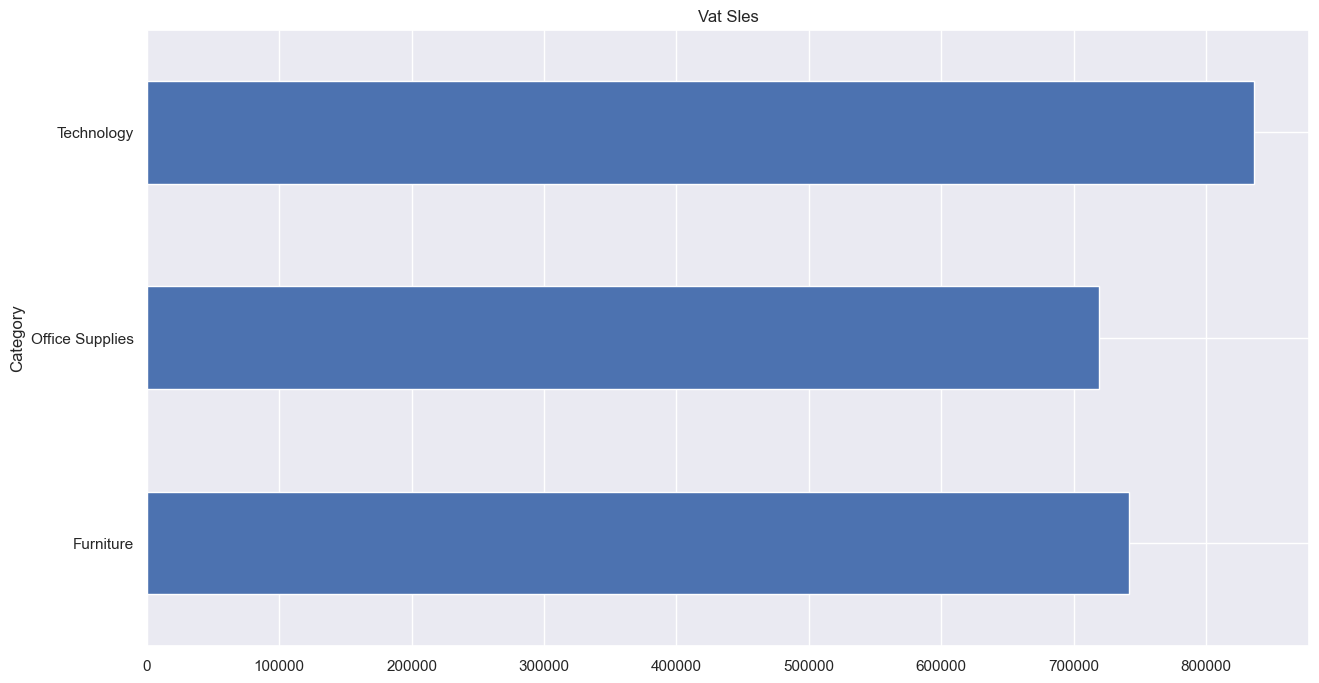

In [45]:
df.groupby('Category')['Sales'].sum().plot(kind = 'barh', title = 'Vat Sles')

Text(0.5, 1.0, 'sns cat selaes')

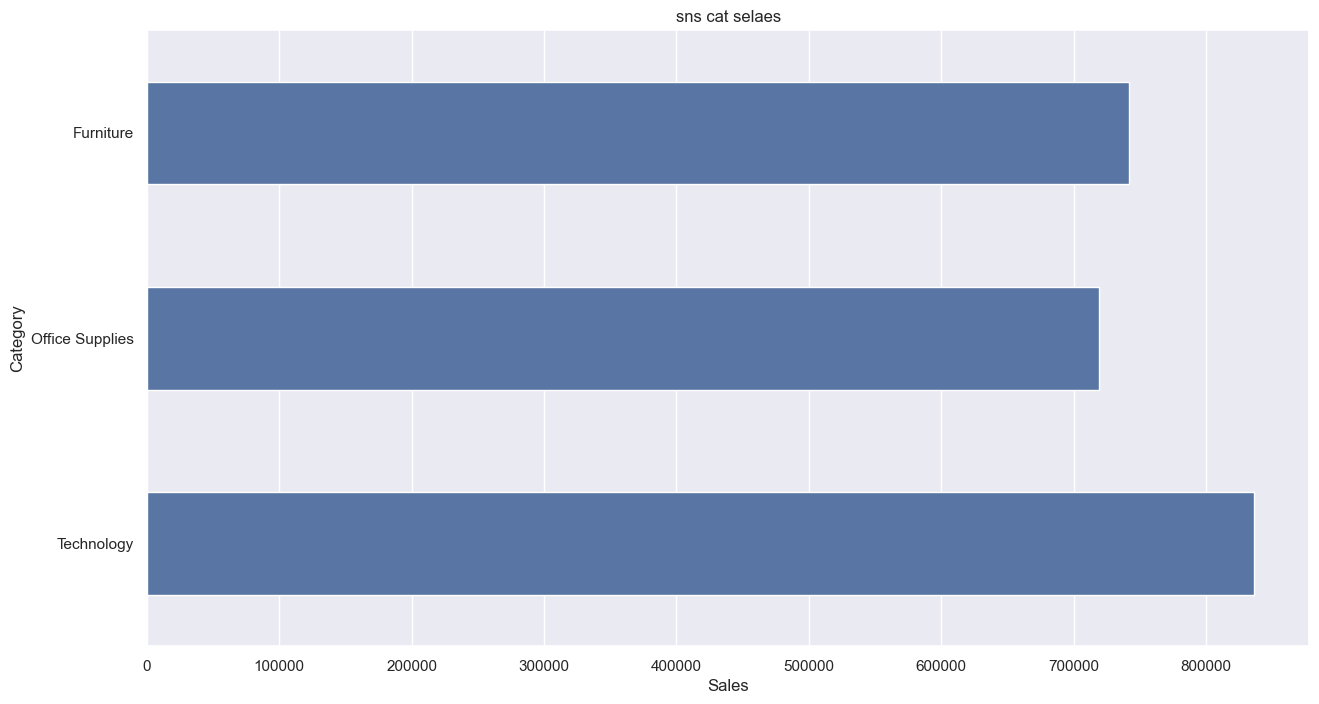

In [46]:
sns.barplot(df,x= 'Sales', y='Category', estimator='sum',errorbar = None, width=0.5).set_title('sns cat selaes')

<Axes: title={'center': 'jadsja jads'}, ylabel='Category'>

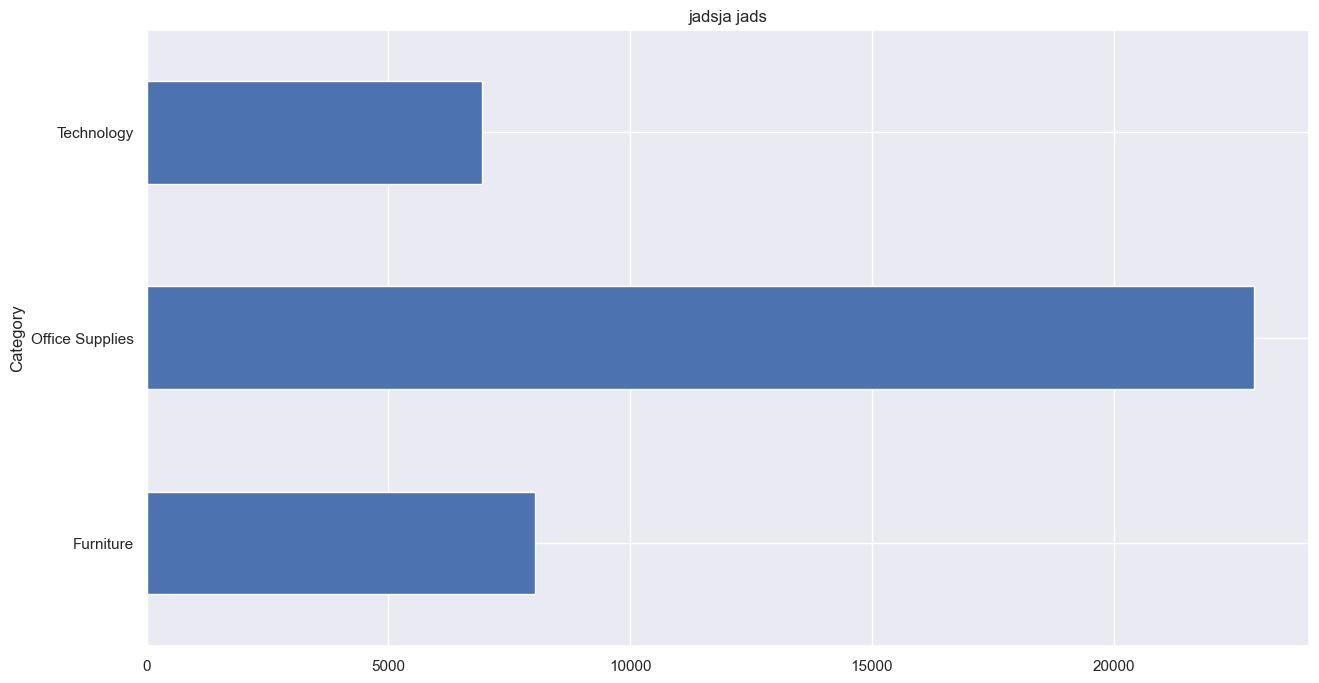

In [47]:
df.groupby('Category')['Quantity'].sum().plot(kind = 'barh',title = 'jadsja jads')

<Axes: xlabel='Segment', ylabel='count'>

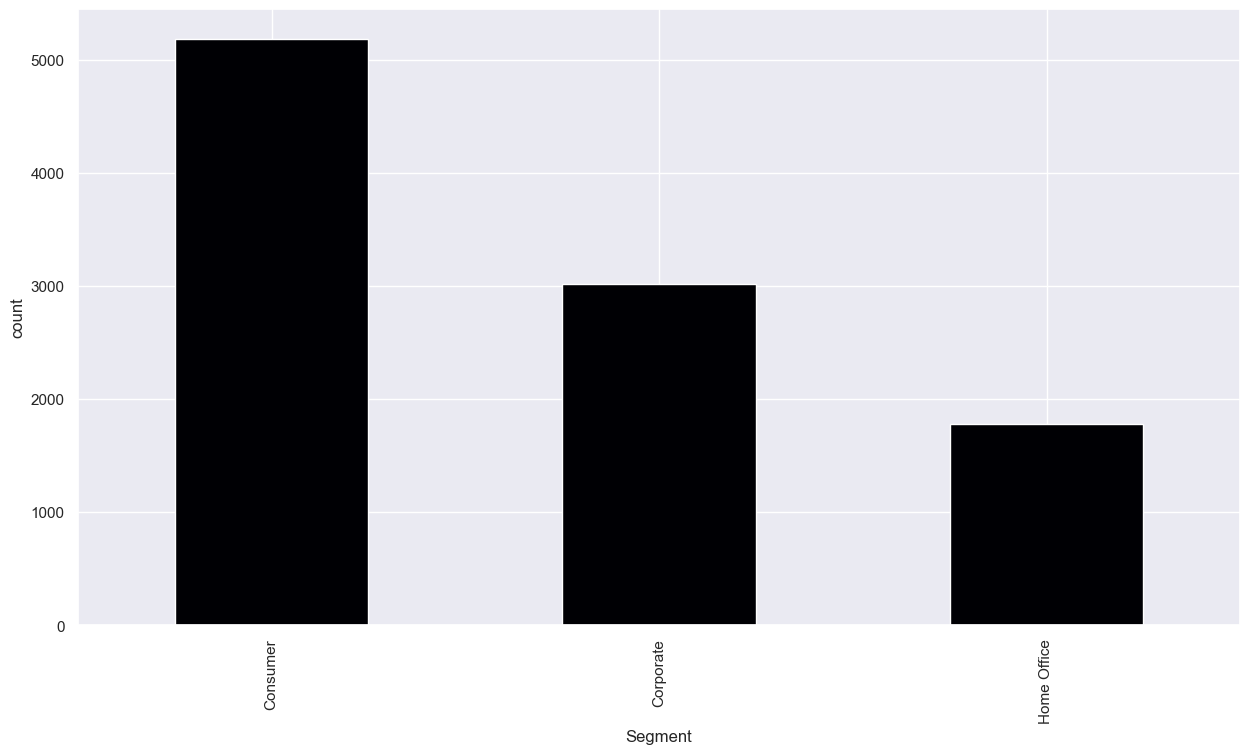

In [48]:
df['Segment'].value_counts().plot(kind = 'bar', xlabel = 'Segment',ylabel = 'count',colormap = 'magma')

#### Most Ordered Category Per Region


In [49]:
df.groupby('Region')['Category'].value_counts()

Region   Category       
Central  Office Supplies    1422
         Furniture           481
         Technology          420
East     Office Supplies    1712
         Furniture           601
         Technology          535
South    Office Supplies     995
         Furniture           332
         Technology          293
West     Office Supplies    1897
         Furniture           707
         Technology          599
Name: count, dtype: int64

In [50]:
df.groupby('Region')['Category'].value_counts()

Region   Category       
Central  Office Supplies    1422
         Furniture           481
         Technology          420
East     Office Supplies    1712
         Furniture           601
         Technology          535
South    Office Supplies     995
         Furniture           332
         Technology          293
West     Office Supplies    1897
         Furniture           707
         Technology          599
Name: count, dtype: int64

#### Repartition of the Profit per Region

In [51]:
df.groupby('Region')['Profit'].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [52]:
df.groupby('Region')['Profit'].sum().index

Index(['Central', 'East', 'South', 'West'], dtype='object', name='Region')

In [53]:
df.groupby('Region')['Profit'].sum().values

array([ 39706.3625,  91522.78  ,  46749.4303, 108418.4489])

###### Присвойте индексы  новой переменной labels, а значения переменной values

In [56]:
labels =  df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

In [57]:
print(labels)
print(values)

Index(['Central', 'East', 'South', 'West'], dtype='object', name='Region')
[ 39706.3625  91522.78    46749.4303 108418.4489]


In [58]:
 sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

###### Создайте новую переменную colors, куда необходимо поместить первые 4 цвета из палитры выше

In [59]:
colors = sns.color_palette('pastel')[:4]
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019)]

##### Построить pie chart  через plt.pie , данные выразить в качестве процентов, округлив их до десятых. Задать title

Text(0.5, 1.0, 'Repartition of the profit per Region')

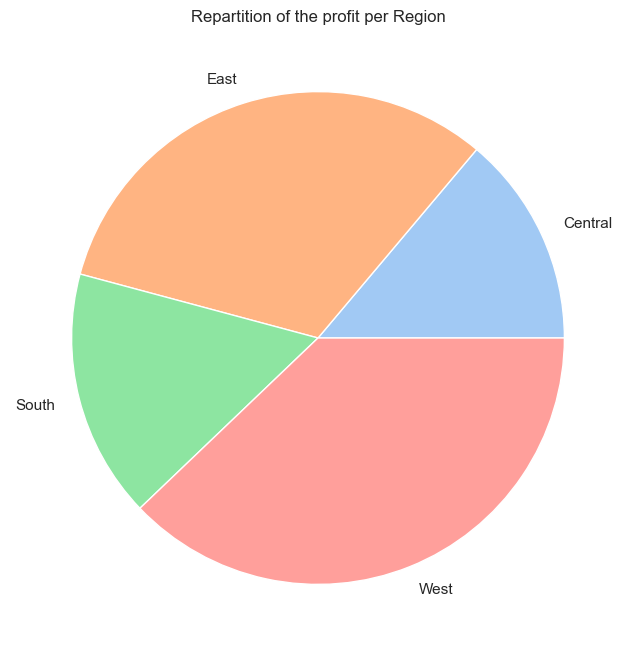

In [60]:
plt.pie(values,labels = labels,colors = colors)
plt.title('Repartition of the profit per Region')

###### Отобразить продажи по категории Technology

In [61]:
df[df['Category'] == 'Technology']

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,1/16/2016,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9/22/2016,9/28/2016,Standard Class,RC-19960,Ryan Crowe,Consumer,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [62]:
df.groupby('Region')['Profit'].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

###### Попробуйте создать pie-chart ниже самостоятельно

In [ ]:
labels =  df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

Text(0.5, 1.0, 'Repartition of the profit per Region')

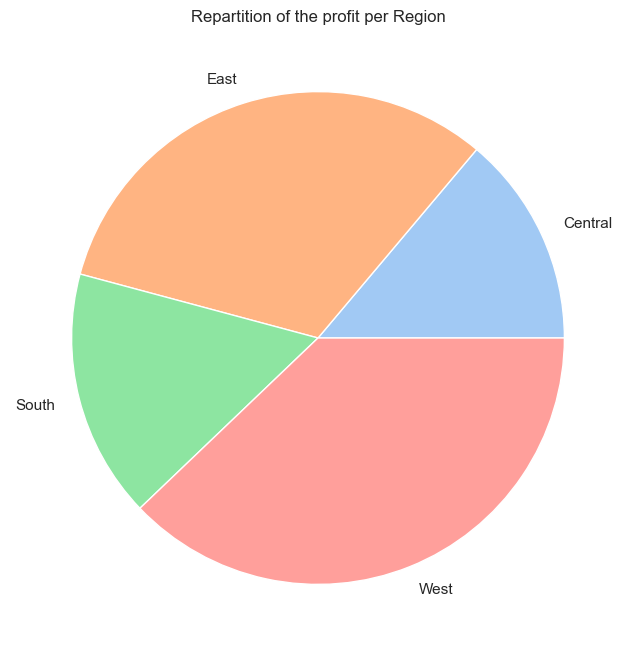

In [63]:
plt.pie(values,labels = labels,colors = colors)
plt.title('Repartition of the profit per Region')

 Even if the West order more technology product than the East, the East make more profit


### City & Profit

#### Создать функцию city_profit, которая принимает необходимую категорию и возвращает bar chart , который показывает топ 5 городов по наибольшей прибыли в указанной категории (см. пример выхода ниже)

In [76]:
sns.set_style('whitegrid')
def city_profit(Category_name):
    df1 = df[df['Category'] == Category_name]
    df.groupby('City')['Profit'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar',title = f'Top 5 cities made profit in {Category_name}')
    

In [77]:
df.groupby('City')['Profit'].sum().sort_values(ascending = False)

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
                    ...    
Chicago          -6654.5688
Lancaster        -7239.0684
San Antonio      -7299.0502
Houston         -10153.5485
Philadelphia    -13837.7674
Name: Profit, Length: 531, dtype: float64

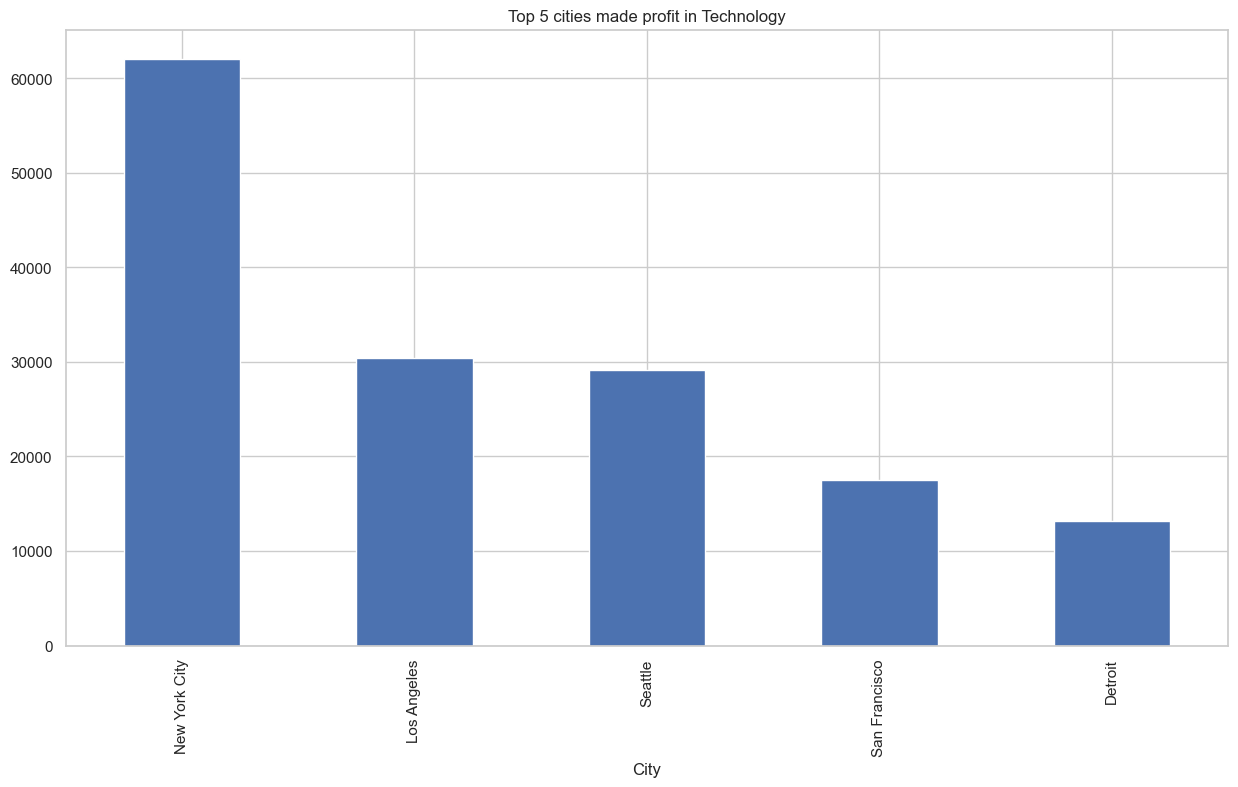

In [78]:
city_profit('Technology')

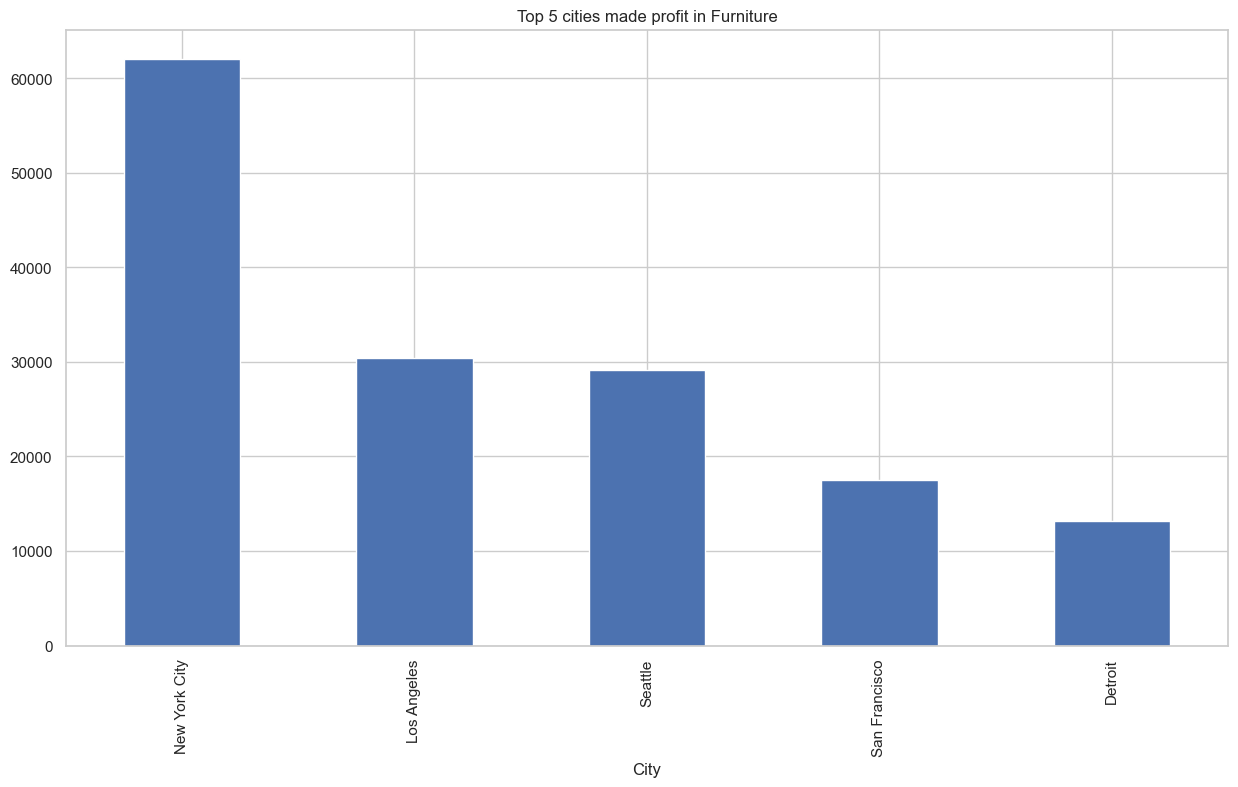

In [79]:
city_profit('Furniture')

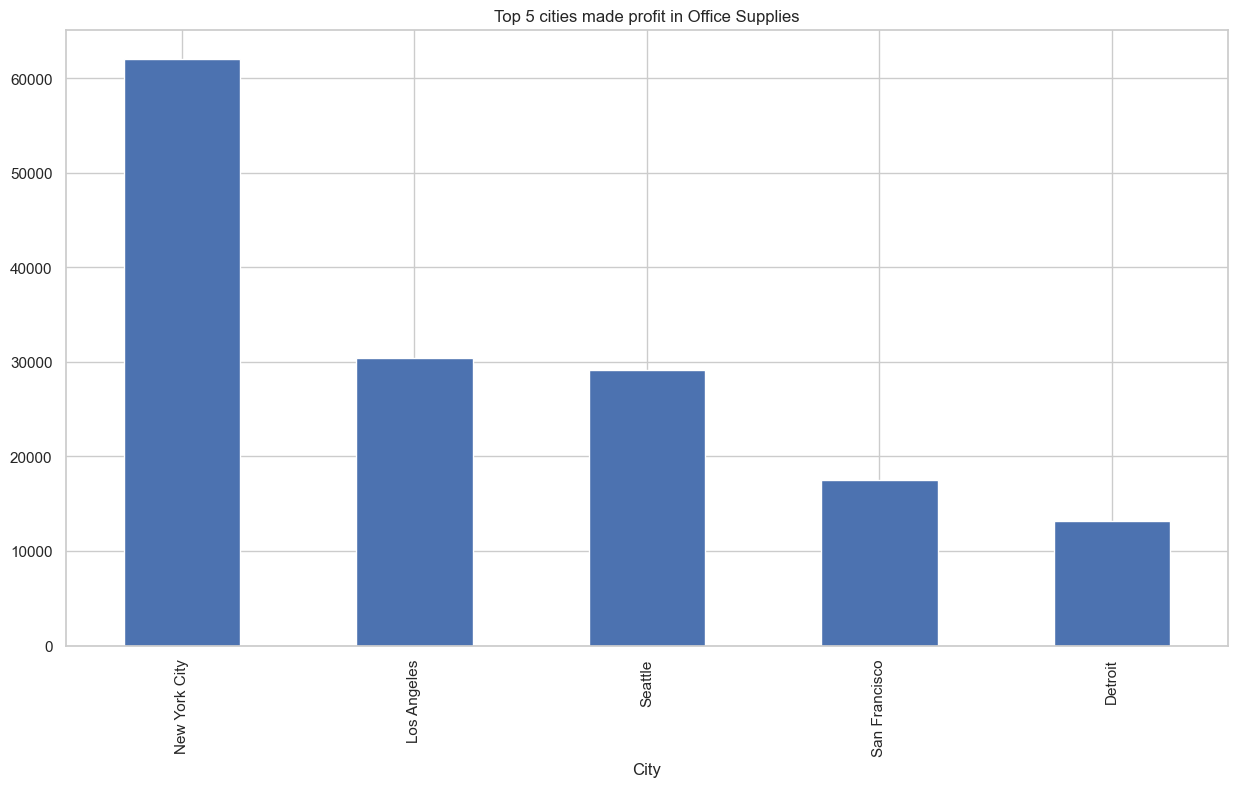

In [80]:
city_profit('Office Supplies')

##### От чего могут зависеть продажи в городах?

##### Отобразить график ниже

In [81]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

C:\Users\akzholtoev_a\AppData\Local\Temp\ipykernel_18868\220029105.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = df['Sub-Category'],palette = 'magma')


<Axes: xlabel='Sub-Category', ylabel='count'>

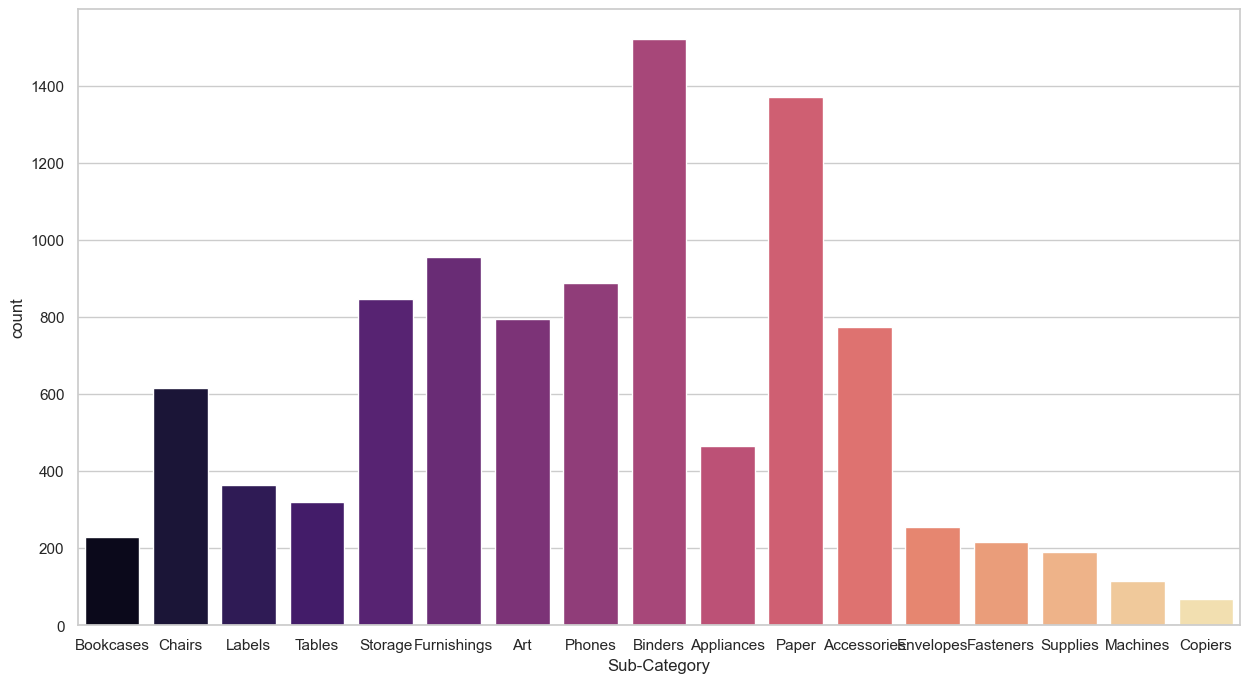

In [84]:
sns.countplot(df,x = df['Sub-Category'],palette = 'magma')

### Customers

Вывести частоту закупок по каждому покупателю

In [86]:
df['Customer Name'].value_counts()

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64

вывести top 10 покупателей по количеству заказов

In [87]:
 df['Customer Name'].value_counts().head(10)

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: count, dtype: int64

<Axes: title={'center': 'Customer name and poduct story'}, ylabel='Customer Name'>

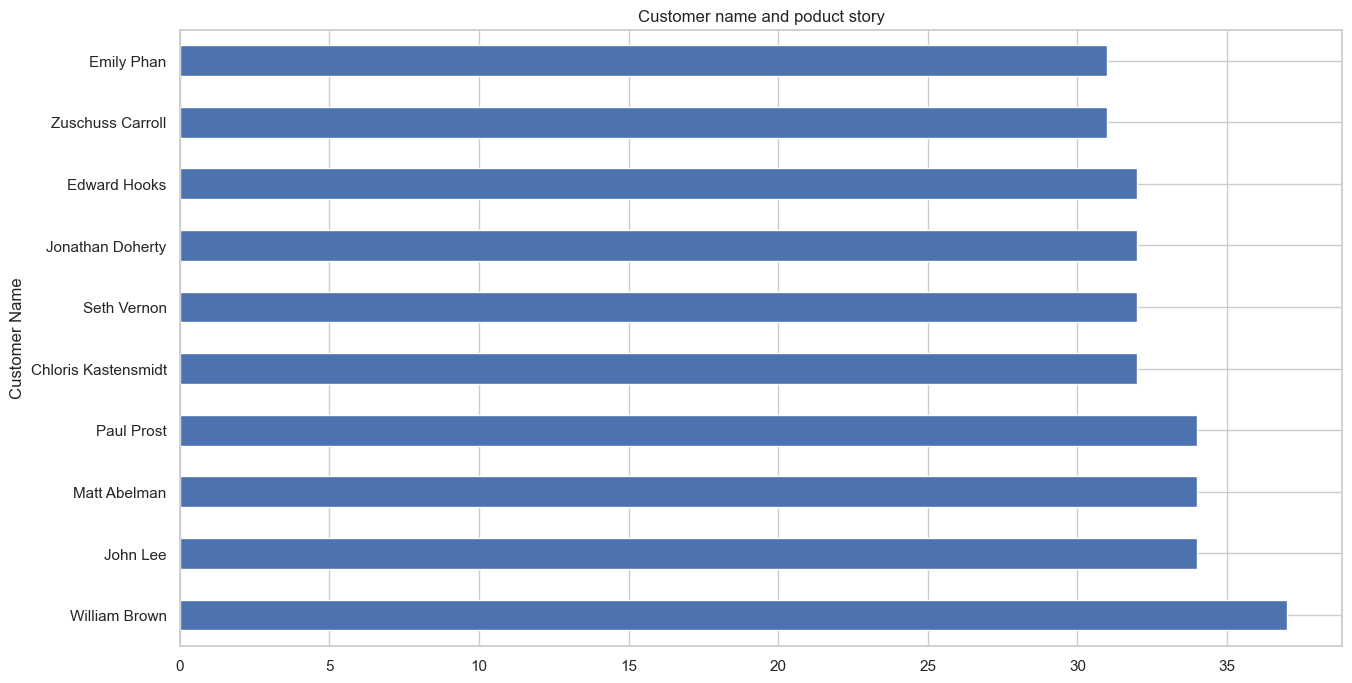

In [90]:
plt.figure(figsize = (15,8))
df['Customer Name'].value_counts().head(10).plot(kind = 'barh',title = 'Customer name and poduct story')

Преобразовать в список имена top10 покупателей и передать список переменной customers

In [110]:
cust = df['Customer Name'].value_counts().head(10)
customers = cust.index.tolist()
customers


['William Brown',
 'John Lee',
 'Matt Abelman',
 'Paul Prost',
 'Chloris Kastensmidt',
 'Seth Vernon',
 'Jonathan Doherty',
 'Edward Hooks',
 'Zuschuss Carroll',
 'Emily Phan']

С использованием метода isin проверить столбец df['Customer Name'] на наличие имен из списка customers. Передать данный вывод переменной filters.

In [111]:
df['Customer Name'].isin(customers)

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Customer Name, Length: 9994, dtype: bool

In [17]:
A = df[filters]
A

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
34,35,CA-2017-107727,10/19/2017,10/23/2017,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
140,141,CA-2016-110366,9/5/2016,9/7/2016,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",82.800,2,0.2,10.3500
298,299,CA-2016-142545,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,32.400,5,0.0,15.5520
299,300,CA-2016-142545,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",1082.480,8,0.0,10.8248
300,301,CA-2016-142545,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-PA-10004243,Office Supplies,Paper,Xerox 1939,56.910,3,0.0,27.3168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9851,CA-2016-158155,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2,0.0,4.0192
9851,9852,CA-2016-158155,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90.480,3,0.2,33.9300
9852,9853,CA-2016-158155,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168
9853,9854,CA-2016-158155,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,FUR-FU-10002253,Furniture,Furnishings,"Howard Miller 13"" Diameter Pewter Finish Round...",214.700,5,0.0,83.7330


In [18]:
colors = sns.color_palette('pastel')[0:]

Создать переменную values, для которой необходимо сгруппировать таблицу A по 'Customer Name' по сумме прибыли (Profit)

In [95]:
values = df.groupby('Customer Name')['Profit'].sum().reset_index()
values

,Customer Name,Profit
0,Aaron Bergman,129.3465
1,Aaron Hawkins,365.2152
2,Aaron Smayling,-253.5746
3,Adam Bellavance,2054.5885
4,Adam Hart,281.1890
...,...,...
788,Xylona Preis,621.2300
789,Yana Sorensen,1778.2923
790,Yoseph Carroll,1305.6290
791,Zuschuss Carroll,-1032.1490


##### Обратите внимание, что Zuschuss Carroll находится в топе по количеству заказов, но прибыль по нему отрицательная. 

In [104]:
A = A[A['Customer Name'] != 'Zuschuss Carroll']
A

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
34,10/19/2017,10/23/2017,Second Class,MA-17560,Matt Abelman,Home Office,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
140,9/5/2016,9/7/2016,Second Class,JD-15895,Jonathan Doherty,Corporate,Philadelphia,Pennsylvania,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",82.800,2,0.2,10.3500
298,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,Belleville,New Jersey,7109,East,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,32.400,5,0.0,15.5520
299,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,Belleville,New Jersey,7109,East,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",1082.480,8,0.0,10.8248
300,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,Belleville,New Jersey,7109,East,OFF-PA-10004243,Office Supplies,Paper,Xerox 1939,56.910,3,0.0,27.3168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,New York City,New York,10009,East,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2,0.0,4.0192
9851,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,New York City,New York,10009,East,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90.480,3,0.2,33.9300
9852,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,New York City,New York,10009,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168
9853,5/2/2016,5/6/2016,Standard Class,EH-13765,Edward Hooks,Corporate,New York City,New York,10009,East,FUR-FU-10002253,Furniture,Furnishings,"Howard Miller 13"" Diameter Pewter Finish Round...",214.700,5,0.0,83.7330


In [96]:
customers

NameError: name 'customers' is not defined

Удалите 'Zuschuss Carroll' из списка

In [113]:
customers.remove('Zuschuss Carroll')

Сгруппируйте заново таблицу A по сумме прибыли

In [115]:
df.groupby('Customer Name')['Profit'].sum()

Customer Name
Aaron Bergman          129.3465
Aaron Hawkins          365.2152
Aaron Smayling        -253.5746
Adam Bellavance       2054.5885
Adam Hart              281.1890
                        ...    
Xylona Preis           621.2300
Yana Sorensen         1778.2923
Yoseph Carroll        1305.6290
Zuschuss Carroll     -1032.1490
Zuschuss Donatelli     249.1307
Name: Profit, Length: 793, dtype: float64

Постройте Pie chart как на графике ниже

ValueError: Wedge sizes 'x' must be non negative values

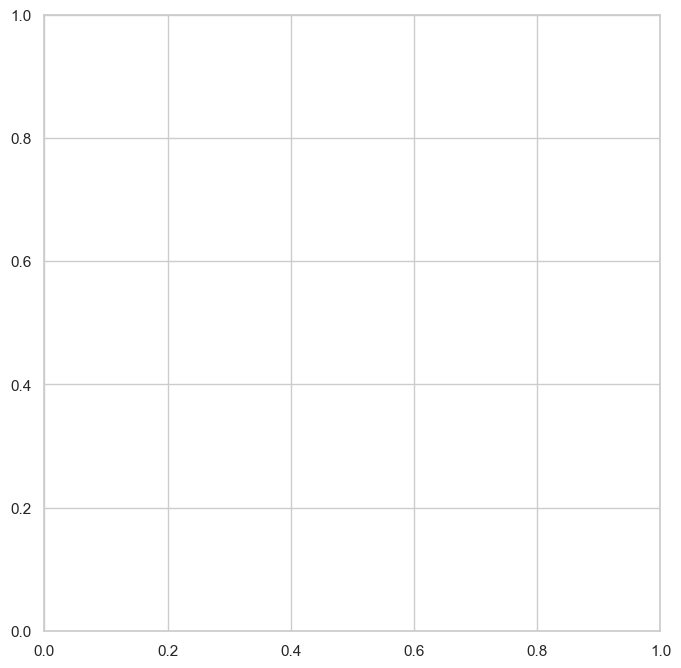

In [123]:

labels = df.groupby('Customer Name')['Profit'].sum().index
values = df.groupby('Customer Name')['Profit'].sum().values

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Reporting of the Profit for the Top 9 Customers')
plt.show()


Покажите количество продаж по регионам

In [124]:
a = df.groupby('Region')['Region'].count()
a

Region
Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

Как и в предыдущих шагах, разделите названия регионов и значения с помощью index и values для построения Pie Chart. 

In [128]:
values = a.values

In [129]:
index = a.index

Постройте круговую диаграмму как показано ниже

ValueError: 'label' must be of length 'x'

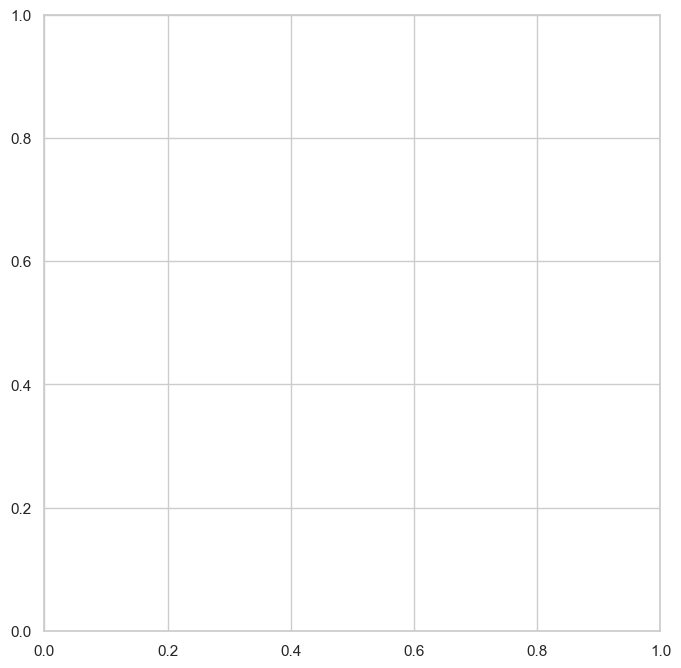

In [130]:
plt.pie(x= values,labels = labels, colors = colors )

In [ ]:
df